In [1]:
from os.path import join, dirname
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches, lines

from nilearn import image, plotting, masking

In [2]:
dir_root = join('/mnt/ext5/GP/fmri_data')
dir_mask = join(dir_root,'masks')

In [3]:
img_bg = join('/usr/local/afni/abin/MNI152_2009_template.nii.gz')

---

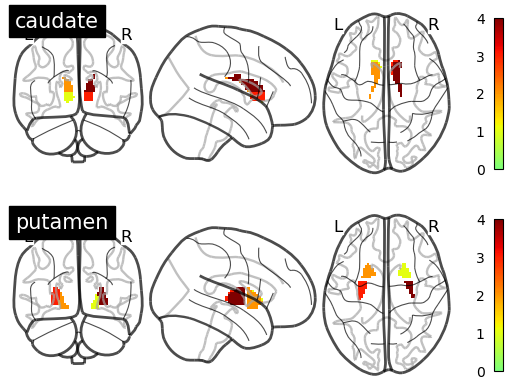

In [4]:
fig, axs = plt.subplots(nrows=2)

imgs = {}
for ii, roi in enumerate(['caudate','putamen']):
    ax = axs[ii]
    imgs[roi] = image.load_img(
        join(dir_mask,'mask.TTatlas.%s.resampled.nii'%roi),
    )
    plotting.plot_glass_brain(
        imgs[roi],
        title=roi,
        cmap=cm.jet, colorbar=True,
        axes=ax
    )

In [ ]:
img_mask = image.math_img(
    img1=imgs['putamen'], img2=imgs['caudate'],
    formula='img1 + (img2+4)*(img2>0)'
)

In [ ]:
plotting.view_img(
    img_mask,
    cmap=cm.jet.resampled(9), colorbar=True, symmetric_cmap=False,
    resampling_interpolation='nearest'
)

/home/sungbeenpark/anaconda3/envs/GP/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
list_label=[
    'raPU', 'laPU', 'lpPU', 'rpPU',
    'laCA', 'lpCA', 'raCA', 'rpCA'
]

---

/home/sungbeenpark/anaconda3/envs/GP/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:572: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)
/tmp/ipykernel_2908175/1359396457.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow')


(0.0, 1.0, 0.0, 1.0)

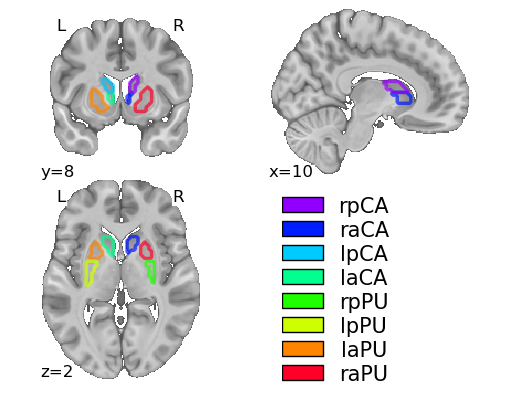

In [8]:
fig, ax = plt.subplots()

## Plotting Nilearn ROIs
display = plotting.plot_roi(
    img_mask, black_bg=False,
    bg_img=img_bg,
    display_mode='tiled', draw_cross=False,
    cut_coords=(10,8,2),
    view_type='contours', linewidths=2.5,
    cmap='gist_rainbow',
    axes=ax
)
# display.add_contours(img_striatum, filled=False, cmap='gist_rainbow')

### legend
nax = fig.add_axes([0.55, 0.1, .16, .4])

cmap = cm.get_cmap('gist_rainbow')
colors = np.round(np.linspace(0, cmap.N-1, len(list_label)+1)).astype(int)

for ii, roi in enumerate(list_label):
    rgb = cmap(colors[ii])
    x, y = 0, 0.02 + 0.125*ii
    w, h = 0.4, 0.075 
    nax.add_patch(patches.Rectangle((x,y),w , h, facecolor=rgb, edgecolor='k'))
    nax.text(
        x+w+.4, y+0.03,
        roi,
        fontsize=15,
        ha='center', va='center'
    )
    
nax.axis('off')

In [9]:
# fig.savefig(
#     '/home/sungbeenpark/Github/labs/GL/results/GL.GLM.pointplot_with_ROIs.png'
#     , dpi=300, facecolor=[1,1,1,1], bbox_inches = "tight"
# )